In [1]:
import tushare as ts
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
import numpy as np

# 设置tushare pro的token并获取连接
ts.set_token('d3fdbde82434cd6d7897550852136449f9fcba912e3eacb47b004600')
pro = ts.pro_api()

# 股票日线
# df = ts.pro_bar(ts_code='000002.SZ', adj='hfq', start_date='20170601', end_date='20190615')
df = ts.pro_bar(ts_code='000002.SZ', adj='qfq',  start_date='20190501', end_date='20190615')

#指数日线
# df = pro.index_daily(ts_code='000001', start_date='20180101', end_date='20181011')

# print(df)


# plt.scatter(list(df['trade_date'])[::-1], list(df['open'])[::-1])
# plt.show()


change_list = np.array([float(i) for i in list(df['change'])[::-1]]).reshape(-1,1)
vol_list = np.array([float(i/10000) for i in list(df['vol'])[::-1]]).reshape(-1,1)

# print(change_list)
# print(vol_list)

lr = linear_model.LinearRegression()

lr.fit(vol_list, change_list)

print(lr.score(vol_list, change_list))
print(lr.coef_)
print(lr.intercept_)

f = lr.coef_[0] * vol_list + lr.intercept_

plt.scatter(vol_list, change_list)
plt.plot(vol_list, f, color='r', label='predit')
plt.show()





0.015218993244098922
[[0.00565746]]
[-0.22309482]


<Figure size 640x480 with 1 Axes>

[[100.]
 [ 50.]
 [100.]
 [100.]
 [ 50.]
 [ 80.]
 [ 75.]
 [ 65.]
 [ 90.]
 [ 90.]]
score=0.6640713116245224
coefficients(b1,b2...): [0.06782609]
intercept(b0): 1.2739130434782604


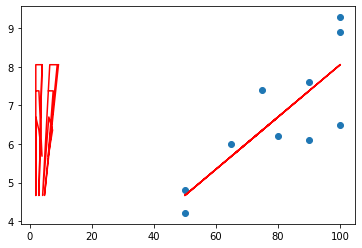

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model

# 定义训练数据
x = np.array([[100,4,9.3],[50,3,4.8],[100,4,8.9],
              [100,2,6.5],[50,2,4.2],[80,2,6.2],
              [75,3,7.4],[65,4,6],[90,3,7.6],[90,2,6.1]])
# print(x)
# X = x[:,:-1]
Y = x[:,-1]
# print(X,Y)


# # 建立模型
# regr = linear_model.LinearRegression()

# # 训练数据
# regr.fit(X,Y)

# # 拿到相关系数
# print('coefficients(b1,b2...):',regr.coef_)
# print('intercept(b0):',regr.intercept_)

# # 评估模型
# print("score0=" + str(regr.score(X, Y)))

# # 预测
# x_test = np.array([[102,6],[100,4]])
# y_test = regr.predict(x_test)
# print(y_test)



X1 = x[:,:1]
print(X1)
# print(Y)

regr = linear_model.LinearRegression()
regr.fit(X1,Y)
print("score=" + str(regr.score(X1, Y)))
print('coefficients(b1,b2...):',regr.coef_)
print('intercept(b0):',regr.intercept_)

y_line = regr.coef_[0] * X1 + regr.intercept_

plt.scatter(X1,Y)
plt.plot(x, y_line, color='r')

plt.show()


#建立模型

#lrModel = sklearn.linear_model.LinearRegression()
#训练模型
#lrModel.fit(x,y)

# 模型评估
# lrModel.score(x,y)

# 模型预测
# lrModel.predict(x)

In [25]:
regr.score(X1, Y)

0.6640713116245224